In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import sklearn
import os
import seaborn as sns
from google.colab.patches import cv2_imshow
import glob
import keras
from keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation, Flatten, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD

In [ ]:
seed = 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 batch_size=16

In [ ]:
train_path="/content/drive/MyDrive/Capstone_data/Clahe_train"
test_path="/content/drive/MyDrive/Capstone_data/Clahe_test"
val_path="/content/drive/MyDrive/Capstone_data/Clahe_val"

In [ ]:
train_normal = glob.glob(train_path+"/normal/*.jpeg")
train_pneumonia = glob.glob(train_path+"/pneumonia/*.jpeg")

test_normal = glob.glob(test_path+"/normal/*.jpeg")
test_pneumonia = glob.glob(test_path+"/pneumonia/*.jpeg")

val_normal = glob.glob(val_path+"/normal/*.jpeg")
val_pneumonia = glob.glob(val_path+"/pneumonia/*.jpeg")

In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [ ]:
df_train.head()
df_test.head()
df_val.head()

,class,image
0,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...
1,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...
2,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...
3,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...
4,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...


In [ ]:
df_train=df_train.sample(frac=1)

In [ ]:
df_train.head()

,class,image
2188,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...
3554,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...
1483,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...
3219,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...
3009,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...


In [ ]:
df_train['class'].value_counts()

Pneumonia    3875
Normal       1341
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
Y = df_train[['class']]

kf = KFold(n_splits = 5)
                         
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
        rescale = 1./255)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetV2M
from tensorflow.keras.layers.experimental.preprocessing import Normalization

In [ ]:
df_train.shape
n=5216

In [ ]:
x=len(train_normal)
y=len(train_pneumonia)
s1=(x+y)//batch_size
a=len(test_normal)
b=len(test_pneumonia)
s2=(a+b)//batch_size

In [ ]:
from keras.callbacks import ReduceLROnPlateau
import numpy as np
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import load_model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np

In [ ]:
from tensorflow import keras
from keras import optimizers
import matplotlib.pyplot as plt

In [ ]:
def printHistory(history, title, epochs):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1,epochs+1))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs+1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs+1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(predictions, labels,auc):
    fpr, tpr, thresholds = roc_curve(labels, predictions) 
    plt.title('Receiver Operating Characteristic (ROC)  Curve',fontsize=14)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot(fpr, tpr, 'g',label = 'AUC Score = %0.2f' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('\nTrue Positive Rate (TPR)', fontsize=12)
    plt.xlabel('\nFalse Positive Rate (FPR)', fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def conf(cm,target_names):
    plt.figure(figsize=(5,3))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True,xticklabels=['H', 'P'], yticklabels=['H', 'P'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix')
    plt.show()

K-Fold1
Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
214201816/214201816 [==============================] - 9s 0us/step


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.7127 - accuracy: 0.7283 
Epoch 1: val_accuracy improved from -inf to 0.94327, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms1.h5
260/260 [==============================] - 3489s 13s/step - loss: 0.7127 - accuracy: 0.7283 - val_loss: 0.2709 - val_accuracy: 0.9433 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.8397
Epoch 2: val_accuracy improved from 0.94327 to 0.95673, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms1.h5
260/260 [==============================] - 131s 501ms/step - loss: 0.5300 - accuracy: 0.8397 - val_loss: 0.1854 - val_accuracy: 0.9567 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.3903 - accuracy: 0.8795
Epoch 3: val_accuracy improved from 0.95673 to 0.95769, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms1.h5
260/260 [==================

<ipython-input-21-67957f0e12a3>:54: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


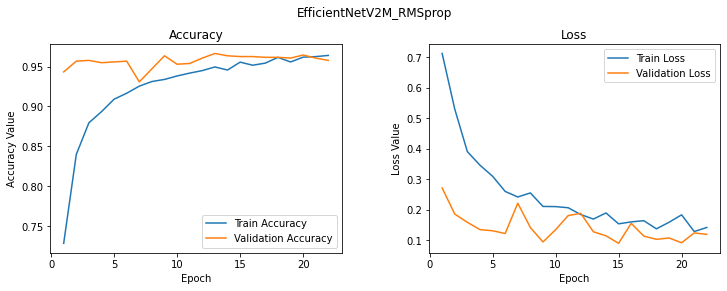

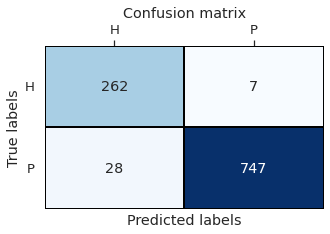

Classification Report
              precision    recall  f1-score   support

      Normal       0.90      0.97      0.94       269
   Pneumonia       0.99      0.96      0.98       775

    accuracy                           0.97      1044
   macro avg       0.95      0.97      0.96      1044
weighted avg       0.97      0.97      0.97      1044



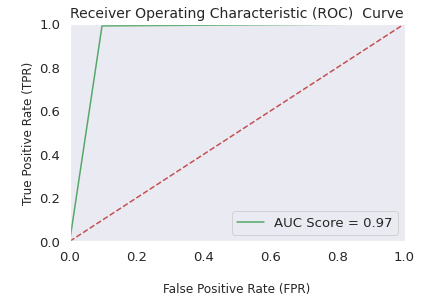

K-Fold2
Found 4173 validated image filenames belonging to 2 classes.
Found 1043 validated image filenames belonging to 2 classes.


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.7510
Epoch 1: val_accuracy improved from -inf to 0.91346, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms2.h5
260/260 [==============================] - 213s 515ms/step - loss: 0.6895 - accuracy: 0.7510 - val_loss: 0.3159 - val_accuracy: 0.9135 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.8624
Epoch 2: val_accuracy improved from 0.91346 to 0.94135, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms2.h5
260/260 [==============================] - 129s 496ms/step - loss: 0.4531 - accuracy: 0.8624 - val_loss: 0.2002 - val_accuracy: 0.9413 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.3887 - accuracy: 0.8877
Epoch 3: val_accuracy did not improve from 0.94135
260/260 [==============================] - 123s 471ms/step - loss: 0.3887 - accuracy: 0.8877 - val_loss:

<ipython-input-21-67957f0e12a3>:54: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


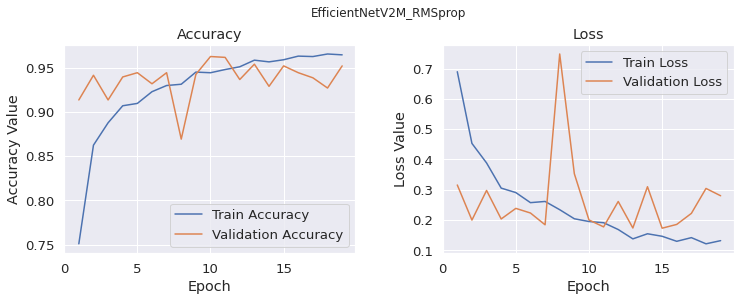

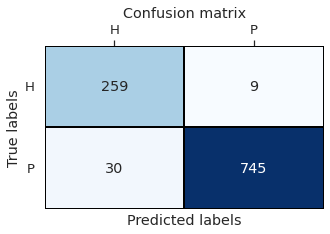

Classification Report
              precision    recall  f1-score   support

      Normal       0.90      0.97      0.93       268
   Pneumonia       0.99      0.96      0.97       775

    accuracy                           0.96      1043
   macro avg       0.94      0.96      0.95      1043
weighted avg       0.96      0.96      0.96      1043



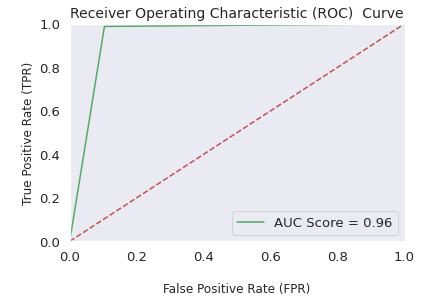

K-Fold3
Found 4173 validated image filenames belonging to 2 classes.
Found 1043 validated image filenames belonging to 2 classes.


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.7383
Epoch 1: val_accuracy improved from -inf to 0.83750, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms3.h5
260/260 [==============================] - 215s 519ms/step - loss: 0.6915 - accuracy: 0.7383 - val_loss: 0.4683 - val_accuracy: 0.8375 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.4602 - accuracy: 0.8595
Epoch 2: val_accuracy improved from 0.83750 to 0.92788, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms3.h5
260/260 [==============================] - 129s 496ms/step - loss: 0.4602 - accuracy: 0.8595 - val_loss: 0.2395 - val_accuracy: 0.9279 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.3778 - accuracy: 0.8927
Epoch 3: val_accuracy improved from 0.92788 to 0.96058, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms3.h5
260/260 [==================

<ipython-input-21-67957f0e12a3>:54: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


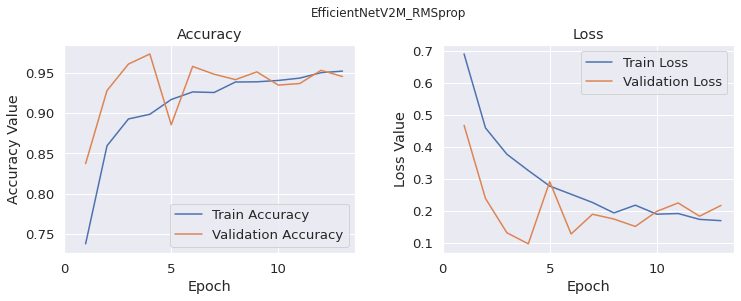

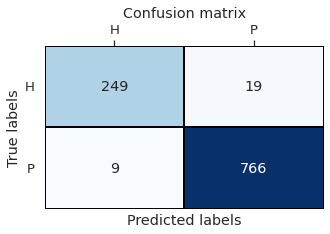

Classification Report
              precision    recall  f1-score   support

      Normal       0.97      0.93      0.95       268
   Pneumonia       0.98      0.99      0.98       775

    accuracy                           0.97      1043
   macro avg       0.97      0.96      0.96      1043
weighted avg       0.97      0.97      0.97      1043



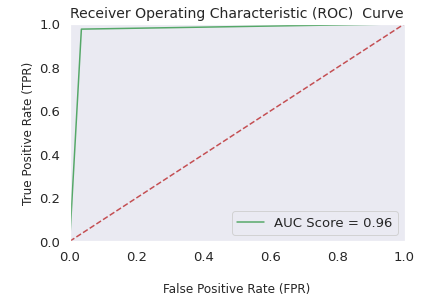

K-Fold4
Found 4173 validated image filenames belonging to 2 classes.
Found 1043 validated image filenames belonging to 2 classes.


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.7477
Epoch 1: val_accuracy improved from -inf to 0.94135, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms4.h5
260/260 [==============================] - 226s 558ms/step - loss: 0.6886 - accuracy: 0.7477 - val_loss: 0.2030 - val_accuracy: 0.9413 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.5080 - accuracy: 0.8593
Epoch 2: val_accuracy did not improve from 0.94135
260/260 [==============================] - 122s 467ms/step - loss: 0.5080 - accuracy: 0.8593 - val_loss: 0.4358 - val_accuracy: 0.8942 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.3853 - accuracy: 0.8833
Epoch 3: val_accuracy improved from 0.94135 to 0.95962, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms4.h5
260/260 [==============================] - 128s 492ms/step - loss: 0.3853 - accuracy: 0.8833 - val_loss:

<ipython-input-21-67957f0e12a3>:54: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


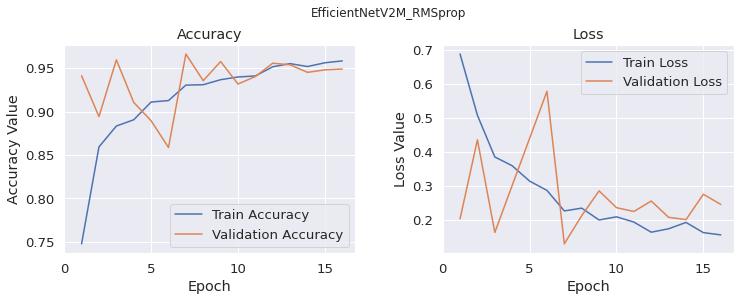

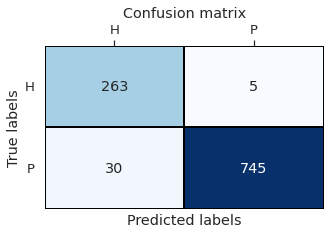

Classification Report
              precision    recall  f1-score   support

      Normal       0.90      0.98      0.94       268
   Pneumonia       0.99      0.96      0.98       775

    accuracy                           0.97      1043
   macro avg       0.95      0.97      0.96      1043
weighted avg       0.97      0.97      0.97      1043



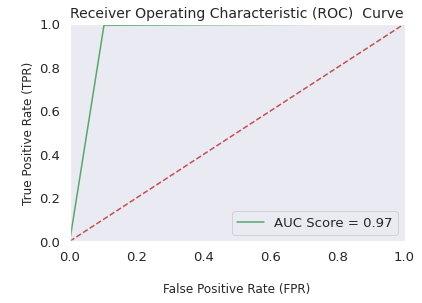

K-Fold5
Found 4173 validated image filenames belonging to 2 classes.
Found 1043 validated image filenames belonging to 2 classes.


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.7501
Epoch 1: val_accuracy improved from -inf to 0.94038, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms5.h5
260/260 [==============================] - 212s 512ms/step - loss: 0.6846 - accuracy: 0.7501 - val_loss: 0.2368 - val_accuracy: 0.9404 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.4735 - accuracy: 0.8650
Epoch 2: val_accuracy did not improve from 0.94038
260/260 [==============================] - 121s 463ms/step - loss: 0.4735 - accuracy: 0.8650 - val_loss: 0.6431 - val_accuracy: 0.8856 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.3816 - accuracy: 0.8886
Epoch 3: val_accuracy improved from 0.94038 to 0.94904, saving model to /content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms5.h5
260/260 [==============================] - 130s 499ms/step - loss: 0.3816 - accuracy: 0.8886 - val_loss:

<ipython-input-21-67957f0e12a3>:54: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


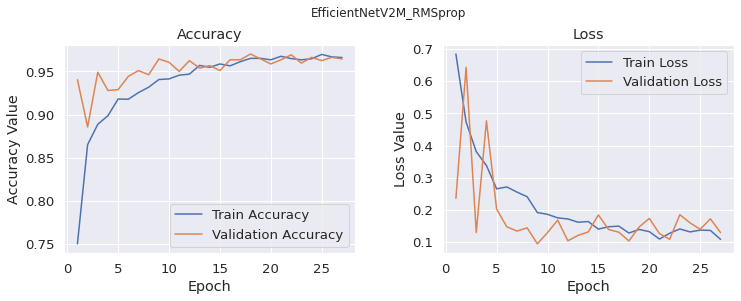

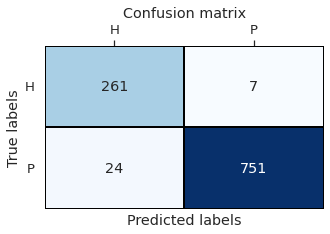

Classification Report
              precision    recall  f1-score   support

      Normal       0.92      0.97      0.94       268
   Pneumonia       0.99      0.97      0.98       775

    accuracy                           0.97      1043
   macro avg       0.95      0.97      0.96      1043
weighted avg       0.97      0.97      0.97      1043



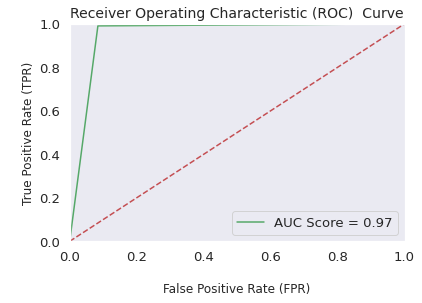

In [ ]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []
TRAINING_ACCURACY=[]
TRAINING_LOSS=[]

save_dir = '/content/drive/MyDrive/Capstone_data/Clahe_train'
fold_var=1
fine_tune_at=30
t=df_train[['class']]
for train_index, val_index in skf.split(np.zeros(len(Y)),Y):
	print("K-Fold"+str(fold_var))
	training_data = df_train.iloc[train_index]
	validation_data = df_train.iloc[val_index]
	
	train_data_generator = train_datagen.flow_from_dataframe(dataframe=training_data,x_col="image",y_col="class",target_size=(224,224),
                                               batch_size=16,class_mode='categorical',shuffle=True)
	valid_data_generator  = test_datagen.flow_from_dataframe(dataframe=validation_data,x_col="image",y_col="class",target_size=(224,224),
                                               batch_size=16,class_mode='categorical',shuffle=False)
        
 	# CREATE NEW MODEL
	model = Sequential()
	conv_base = EfficientNetV2M(input_shape=[224,224]+[3], include_top=False, weights='imagenet')
	for layer in conv_base.layers[:fine_tune_at]:
		layer.trainable = False
	x=  conv_base.output
	x = GlobalAveragePooling2D()(x)
	x = BatchNormalization()(x)
	x = Dropout(0.3)(x) 
	x = Dense(512, activation ='relu')(x)
	x = BatchNormalization()(x)
	x = Dropout(0.5)(x)
	x = Dense(2, activation ='sigmoid')(x)
	model = Model(conv_base.input, x)
	reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=7)
	early_stopping = EarlyStopping(monitor = "val_accuracy",patience = 9,verbose = 1,mode = "max",)
	checkpoint = ModelCheckpoint(monitor = "val_accuracy",filepath = "/content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms"+str(fold_var)+".h5",verbose = 1,save_best_only = True, )
	opt = keras.optimizers.RMSprop(lr=0.0001)
	model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = "accuracy")
	s1=train_data_generator.n//train_data_generator.batch_size
	s2=valid_data_generator.n//valid_data_generator.batch_size
	lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.75 ** np.floor(epoch / 2)))
	history = model.fit(train_data_generator,
    epochs = 30, 
    batch_size = 16,
    validation_data = valid_data_generator,
    validation_steps = s2,
    steps_per_epoch = s1,
    callbacks = [reduce_lr, early_stopping, checkpoint,lr_sched])
	printHistory(history,"EfficientNetV2M_RMSprop",early_stopping.stopped_epoch+1)
	modela = load_model("/content/drive/MyDrive/Capstone_data/crefv2Mmnt_rms"+str(fold_var)+".h5") 
	
	results = modela.evaluate(valid_data_generator)
	results = dict(zip(model.metrics_names,results))
	Y_pred = modela.predict_generator(valid_data_generator)
	y_pred = np.argmax(Y_pred, axis=1)
	target_names = ['Normal','Pneumonia']
	cm = confusion_matrix(valid_data_generator.classes, y_pred)
	conf(cm,target_names)
	print('Classification Report')
	print(classification_report(valid_data_generator.classes, y_pred, target_names=target_names))
	auc = roc_auc_score(valid_data_generator.classes, y_pred) 
	plot_roc_curve(valid_data_generator.classes, y_pred,auc)
	TRAINING_ACCURACY.append(history.history['accuracy'])
	TRAINING_LOSS.append(history.history['loss'])
	VALIDATION_ACCURACY.append(history.history['val_accuracy'])
	VALIDATION_LOSS.append(history.history['val_loss'])

	fold_var += 1

In [ ]:
l1=max(VALIDATION_ACCURACY[0])
l2=max(VALIDATION_ACCURACY[1])
l3=max(VALIDATION_ACCURACY[2])
l4=max(VALIDATION_ACCURACY[3])
l5=max(VALIDATION_ACCURACY[4])

avg=(l1+l2+l3+l4+l5)/5
avg

0.9676923036575318